In [1]:
import os

In [2]:
#!pip install tensorflow-gpu

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
os.getcwd()

'/content'

In [5]:
os.chdir('/content/drive/MyDrive/project')

In [6]:
os.getcwd()

'/content/drive/MyDrive/project'

In [7]:
!nvidia-smi


Wed Jun  1 17:47:43 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   75C    P8    12W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [8]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession


In [9]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob

In [10]:
IMAGE_SIZE = [224, 224]

train_path = '/content/drive/MyDrive/project/dataset/training_validation/train'
valid_path = '/content/drive/MyDrive/project/dataset/training_validation/valid'

In [11]:
inception = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [12]:
# don't train existing weights
for layer in inception.layers:
    layer.trainable = False

In [13]:
  # useful for getting number of output classes
folders = glob('/content/drive/MyDrive/project/dataset/training_validation/train/*')

In [14]:
x = Flatten()(inception.output)

In [23]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=inception.input, outputs=prediction)

In [24]:
# view the structure of the model
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 111, 111, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 111, 111, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                                           

In [25]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [26]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [27]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/project/dataset/training_validation/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 5702 images belonging to 2 classes.


In [28]:
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/project/dataset/training_validation/valid',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 1426 images belonging to 2 classes.


In [21]:
!pip install tensorflow==2.7.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [29]:
# fit the model
r = model.fit(
  training_set,
  validation_data=test_set,
  epochs=21,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/21
179/179 [==============================] - 97s 483ms/step - loss: 0.7645 - accuracy: 0.9155 - val_loss: 0.3258 - val_accuracy: 0.9530
Epoch 2/21
179/179 [==============================] - 83s 461ms/step - loss: 0.2197 - accuracy: 0.9630 - val_loss: 0.1421 - val_accuracy: 0.9727
Epoch 3/21
179/179 [==============================] - 84s 468ms/step - loss: 0.3288 - accuracy: 0.9565 - val_loss: 0.3692 - val_accuracy: 0.9558
Epoch 4/21
179/179 [==============================] - 84s 470ms/step - loss: 0.2633 - accuracy: 0.9676 - val_loss: 0.2869 - val_accuracy: 0.9663
Epoch 5/21
179/179 [==============================] - 84s 468ms/step - loss: 0.3065 - accuracy: 0.9667 - val_loss: 0.3442 - val_accuracy: 0.9628
Epoch 6/21
179/179 [==============================] - 82s 458ms/step - loss: 0.1825 - accuracy: 0.9777 - val_loss: 0.3006 - val_accuracy: 0.9649
Epoch 7/21
179/179 [==============================] - 83s 465ms/step - loss: 0.2150 - accuracy: 0.9772 - val_loss: 0.2111 - val_ac

In [30]:
import matplotlib.pyplot as plt

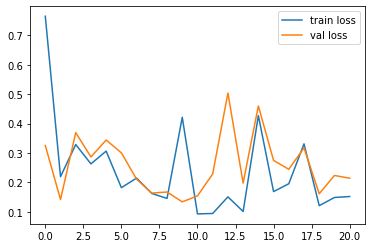

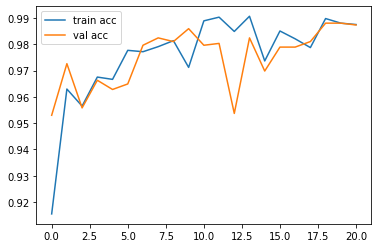

<Figure size 432x288 with 0 Axes>

In [31]:
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [33]:
from tensorflow.keras.models import load_model

model.save('model_inceptionv3.h5')

In [ ]:
y_pred = model.predict(test_set)

In [ ]:
y_pred

In [ ]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [ ]:
y_pred


In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [ ]:
model=load_model('model_resnet50.h5')

In [ ]:
img=image.load_img('dataset/testing/test/PotatoEarlyBlight2.jpg',target_size=(224,224))

In [ ]:
x=image.img_to_array(img)
x

In [ ]:
x.shape

In [ ]:
import numpy as np
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

In [ ]:
model.predict(img_data)

In [ ]:
a=np.argmax(model.predict(img_data), axis=1)